In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
#import csv
df = pd.read_csv('2019.csv')

#drop 'unneccessary' columns
df.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 'GS'], axis=1, inplace=True)

#Fix name formatting
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

#Rename Columns
df.rename({
    'TD'    : 'PassingTD',
    'TD.1'  : 'RushingTD',
    'TD.2'  : 'ReceivingTD',
    'TD.3'  : 'TotalTD',
    'Yds'   : 'PassingYDs',
    'Yds.1' : 'RushingYDs',
    'Yds.2' : 'ReceivingYDs',
    'Att'   : 'PassingAtt',
    'Att.1' : 'RushingAtt'
}, axis=1, inplace=True)

#seperate df based on position
rb_df = df[df['FantPos'] == 'RB']
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']

C:\Users\Kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

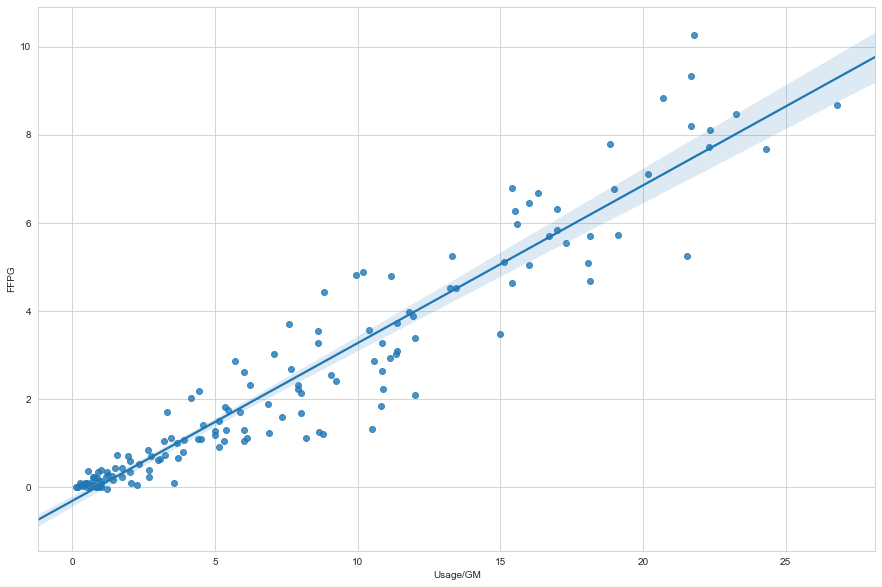

In [10]:
rb_df['FantasyPoints'] = df['PassingYDs']*0.04 + df['PassingTD']*4 - df['Int']*2 + df['RushingYDs']*0.1 
+ df['RushingTD']*6 + df['Rec']*1 + df['ReceivingYDs']*0.1 + df['ReceivingTD']*6 - df['FL']*2

#Create column for fantasy points per game
rb_df['FFPG'] = rb_df['FantasyPoints'] / rb_df['G']
rb_df['FFPG'] = rb_df['FFPG'].apply(lambda x: round(x, 2))

#Now do usage per game
rb_df['Usage/GM'] = (rb_df['RushingAtt'] + rb_df['Tgt'])/rb_df['G']
rb_df['Usage/GM'] = rb_df['Usage/GM'].apply(lambda x: round(x,2))

sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

plot = sns.regplot(x=rb_df['Usage/GM'], y=rb_df['FFPG'], scatter=True)

C:\Users\Kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


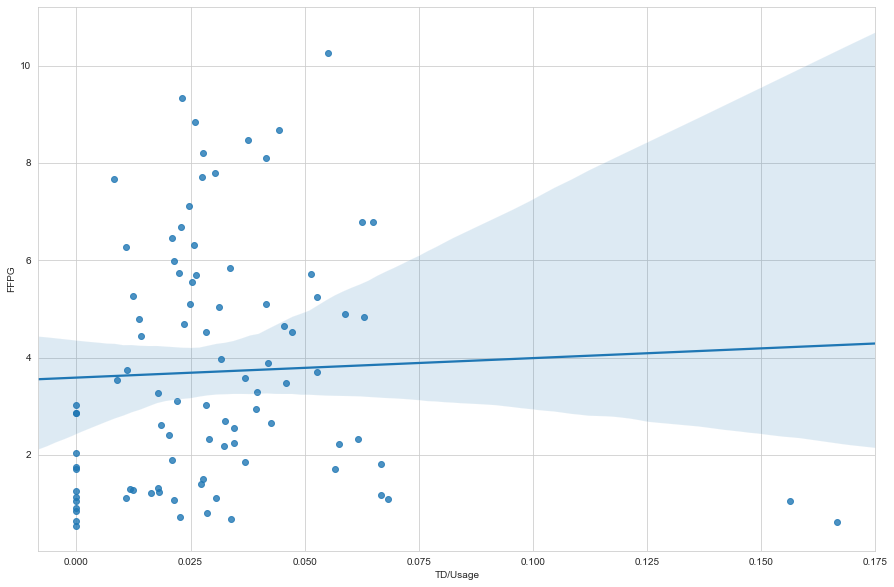

In [14]:
rb_df['TD/Usage'] = (rb_df['RushingTD'] + rb_df['ReceivingTD']) / (rb_df['RushingAtt'] + rb_df['Tgt'])

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

rb_df = rb_df[rb_df['RushingAtt'] > 20]

plot = sns.regplot(x=rb_df['TD/Usage'], y=rb_df['FFPG'], scatter=True)

14      0.80
25      0.40
31      0.60
33      6.00
34      4.04
36      1.60
38      0.20
39      8.58
42      1.00
44      2.00
49      3.22
50      6.10
52      5.82
56      4.00
57     11.50
65      3.40
68      2.30
69     15.90
72      2.30
99      1.10
101     1.80
102     5.40
105     0.40
108    13.00
111     0.20
114     0.40
120     4.10
121     1.60
123     1.60
128     1.10
       ...  
245     0.70
248     2.30
258     0.44
263     4.90
268     4.70
271     0.70
273     5.20
274     0.50
275     0.20
276     1.40
281     1.80
286     1.60
288     0.50
289     4.90
294     1.10
295     1.50
297     1.50
304     0.30
305    10.30
310     0.64
315     2.00
322     0.30
329     3.40
331     7.30
375     0.50
388     3.10
399     2.90
463     0.90
469     0.70
495     0.60
Name: FantasyPoints, Length: 87, dtype: float64


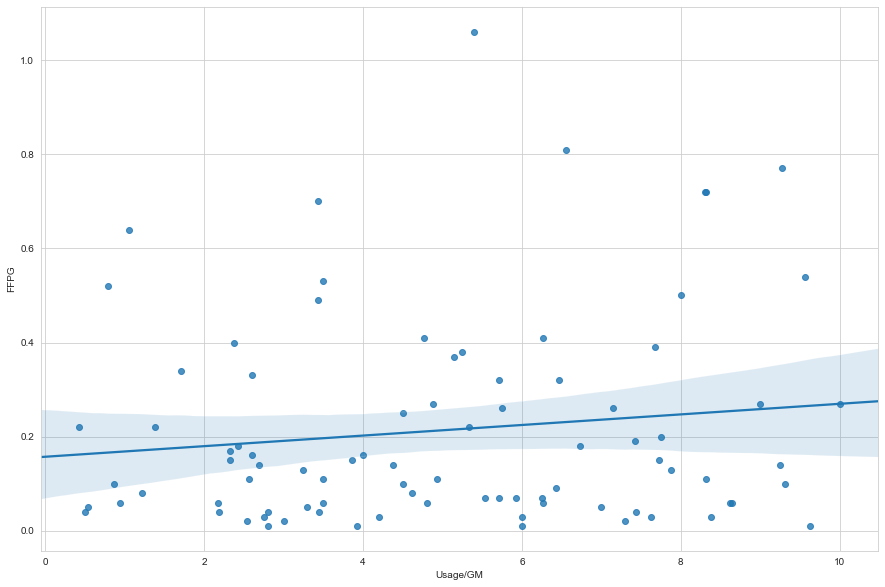

In [21]:
#Now do Wr points per game as a relationship to targets received
wr_df['FantasyPoints'] = df['PassingYDs']*0.04 + df['PassingTD']*4 - df['Int']*2 + df['RushingYDs']*0.1 
+ df['RushingTD']*6 + df['Rec']*1 + df['ReceivingYDs']*0.1 + df['ReceivingTD']*6 - df['FL']*2

#Create column for fantasy points per game
wr_df['FFPG'] = wr_df['FantasyPoints'] / wr_df['G']
wr_df['FFPG'] = wr_df['FFPG'].apply(lambda x: round(x, 2))

#Now do usage per game
wr_df['Usage/GM'] = wr_df['Tgt']/wr_df['G']
wr_df['Usage/GM'] = wr_df['Usage/GM'].apply(lambda x: round(x,2))

sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

wr_df = wr_df[wr_df['FFPG'] > 0]

plot = sns.regplot(x=wr_df['Usage/GM'], y=wr_df['FFPG'], scatter=True)

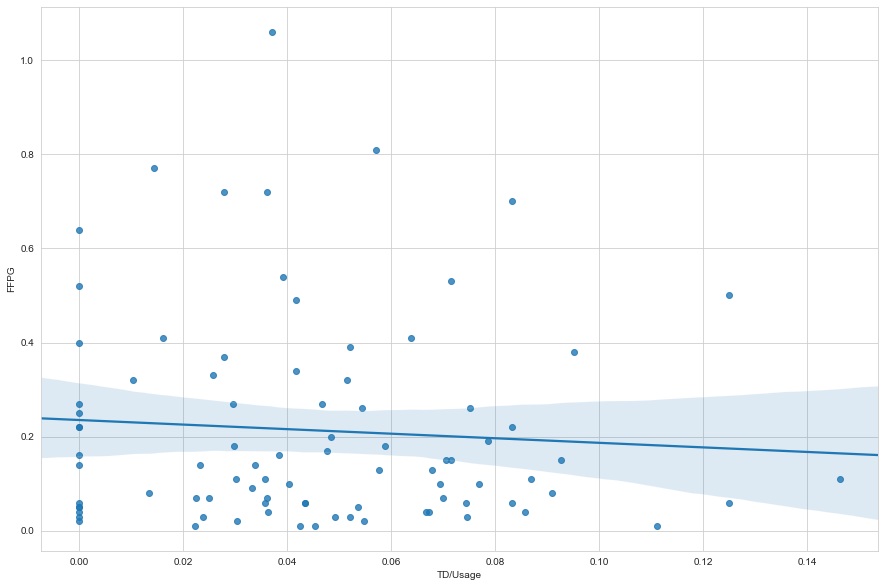

In [20]:
wr_df['TD/Usage'] = wr_df['ReceivingTD'] / wr_df['Tgt']

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

wr_df = wr_df[wr_df['Tgt'] > 3]

plot = sns.regplot(x=wr_df['TD/Usage'], y=wr_df['FFPG'], scatter=True)